# LTAT.02.006 Andmeteaduse meetodid
## 2. praktikumi hüpoteesitestimise ülesanded

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng
from scipy.stats import binomtest

### Ülesanne 1 - õpilaste hinded

Teeme läbi loengus näidatud õpilaste hinnete analüüsi. Õpilaste punktisummad on täisarvud vahemikus 0 kuni 50, puinktisummade keskmine on umbes 31 ja standardhälve 13. Õpilasi oli valimis 1365.

In [ ]:
from scipy.stats import norm

Esmane pakkumine võiks olla, et õpilaste punktisummad järgivad normaaljaotust, mille keskmine on 31 punkti ja standardhälve 13.

Esimene probleem on aga selles, et punktisummad on täisarvulised, normaaljaotus on aga pidev jaotus. Lihtsaim võimalus on eeldada, et nö 'tegelikud punktisummad' on reaalarvulised, aga ümardatakse lähima täisarvuni. Sellisel juhul näiteks kõik punktid vahemikus 0.5...1.5 annaksid punktisummaks 1.

Teine probleem on, et normaaljaotus ei ole piiratud vahemikuga 0...50. Selle probleemi saab lahendada, kui lihtsalt ignoreerida punktisummasid, mis justkui oleksid sellest vahemikust väljas. Sellisel juhul saab leida normaaljaotusest iga punkti jaoks leitud tõenäosused ja skaleerida nii, et kõikide punktide tõenäosuste summa oleks 1.

1. Uurige `scipy` teegi normaaljaotuse [dokumentatsiooni](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). Kuidas saaks leida tõenäosuse, et punktisumma on 1 (esialgu eeldame, et punktisummad võivad minna mõlemale poole lõpmatusse, st ignoreerime skaleerimist).

In [ ]:
norm.cdf(1.5, loc=31, scale=13) - norm.cdf(0.5, loc=31, scale=13)

0.00214300992252474

2. Leidke nüüd kõikide võimalike punktisummade jaoks (0...50) vastava punktisumma saamise tõenäosus. Kuidas käsitleda vahemiku otspunkte 0 ja 50?

In [ ]:
tõenäosused = []
for i in range(0, 51):
    if i == 0:
        tõenäosus = norm.cdf(0.5, loc=31, scale=13) - norm.cdf(0, loc=31, scale=13)
    elif i == 50:
        tõenäosus = norm.cdf(50, loc=31, scale=13) - norm.cdf(49.5, loc=31, scale=13)
    else:
        tõenäosus = norm.cdf(i+0.5, loc=31, scale=13) - norm.cdf(i-0.5, loc=31, scale=13)
    tõenäosused.append(tõenäosus)

In [ ]:
sum(tõenäosused)

0.9195176429830876

3. Skaleeriga saadud tõenäosused nii, et nende summa oleks 1

In [ ]:
skaleeritud_tõenäosused = []
for skaleerimata_tõenäosus in tõenäosused:
    skaleeritud_tõenäosus = skaleerimata_tõenäosus / sum(tõenäosused)
    skaleeritud_tõenäosused.append(skaleeritud_tõenäosus)
skaleeritud_tõenäosused = np.array(skaleeritud_tõenäosused)

In [ ]:
#alternatiiv
skaleeritud_tõenäosused = tõenäosused / sum(tõenäosused)

In [ ]:
sum(skaleeritud_tõenäosused)

1.0

4. Õpilasi oli kokku 1365. Joonistage eelkirjeldatud eeldustel punktisummade jaotus.

<BarContainer object of 51 artists>

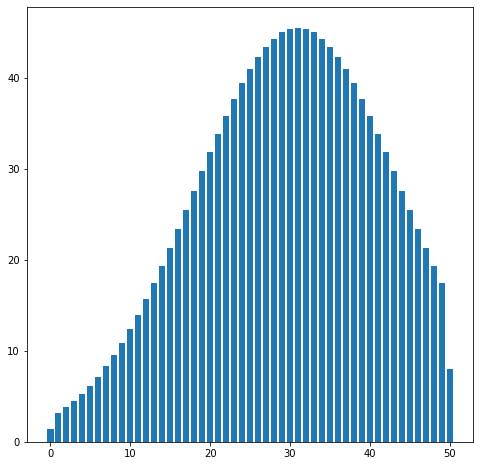

In [ ]:
plt.bar(range(0, 51), skaleeritud_tõenäosused * 1365)

5. Realistlikult aga ei järgi tegelik jaotus nii ilusti teoreetilist jaotust. Tegelik jaotus on mingi juhuslik  valim leitud jaotusest. Võtke 1365 juhuslikku punkti antud jaotusest ja joonistage tulpdiagramm tegelike tulemuste jaotuse kohta.

In [ ]:
rng = default_rng(0)

<BarContainer object of 51 artists>

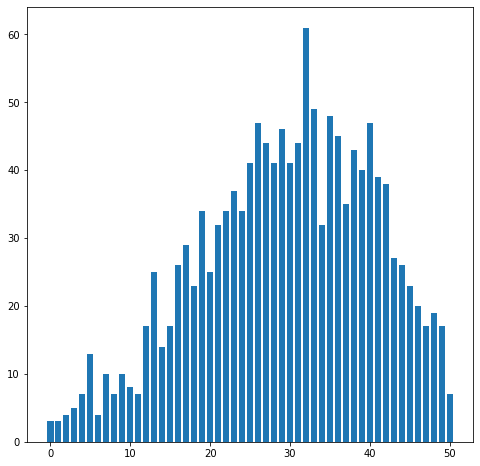

In [ ]:
punktid = rng.choice(range(0, 51), size=1365, p=skaleeritud_tõenäosused)
punktide_arv = np.bincount(punktid)
plt.bar(range(0, 51), punktide_arv)

6. Lugege sisse andmefail 'praktikum_1_yl_2.csv', kus on igas veerus toodud üks tegelik õpilase poolt saadud punktisumma

In [ ]:
data = pd.read_csv("praktikum_1_yl_2.csv")
data

,punktisummad
0,42
1,23
2,3
3,45
4,30
...,...
1360,2
1361,35
1362,39
1363,29


7. Joonistage tegeliku punktisummade jaotus antud faili põhjal.

In [ ]:
# siin on index-ks punktisumma ja igale indeksi elemendile vastab õpilaste arv, kes niipalju punkte said
tegelikud_sagedused = data["punktisummad"].value_counts()
tegelikud_sagedused

<BarContainer object of 51 artists>

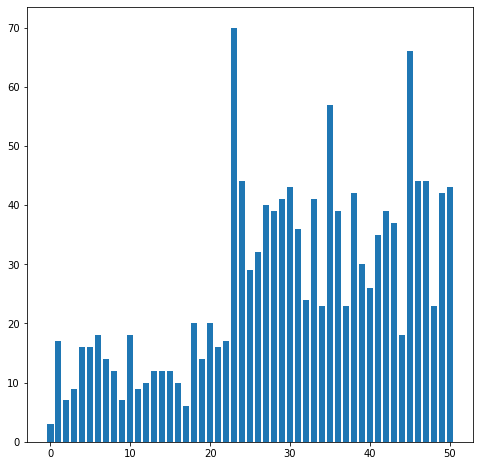

In [ ]:
plt.bar(tegelikud_sagedused.index, tegelikud_sagedused)

8. Kas tegeliku jaotuse põhjal tundub eeldus normaaljaotuse põhjal realistlik?

9. Joonistage viie vahemikuga histogramm tegelikust punktisummade jaotusest. Uurige, mis on `plt.hist` väljundiks.

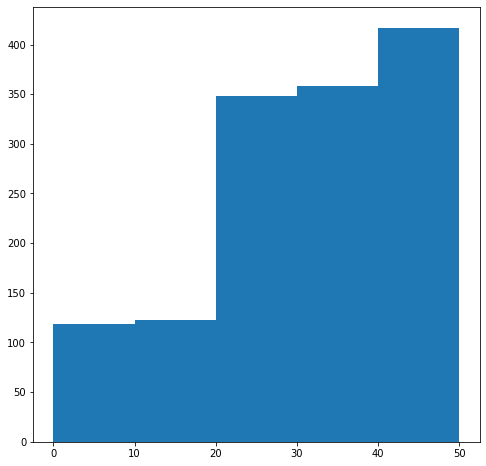

In [ ]:
andmed_5_vahemikus = plt.hist(data["punktisummad"], bins=5)

9. Viimases vahemikus on 11 võimalikku väärtust, samas kui teistes on 10. Seepärast tuleb tõenäosusjaotuse tekitamiseks viimane ümber skaleerida.

In [ ]:
andmed_5_vahemikus[0][4] *= 10./11
andmed_5_vahemikus

(array([119.        , 123.        , 348.        , 358.        ,
        379.09090909]),
 array([ 0., 10., 20., 30., 40., 50.]),
 <a list of 5 Patch objects>)

10. Genereerige nüüd tükiti ühtlane tõenäosusjaotus, kus iga vahemiku osakaal on vastava vahemiku histogrammi kõrgusega vastavuses. Joonistage selle jaotuse tulpdiagramm.

Oodatav tulemus: ![](oodatav_tulemus.png)

In [ ]:
jaotus_5v_jargi = np.repeat(andmed_5_vahemikus[0],[10,10,10,10,11])
jaotus_5v_jargi = jaotus_5v_jargi / sum(jaotus_5v_jargi)
jaotus_5v_jargi

array([0.00871795, 0.00871795, 0.00871795, 0.00871795, 0.00871795,
       0.00871795, 0.00871795, 0.00871795, 0.00871795, 0.00871795,
       0.00901099, 0.00901099, 0.00901099, 0.00901099, 0.00901099,
       0.00901099, 0.00901099, 0.00901099, 0.00901099, 0.00901099,
       0.02549451, 0.02549451, 0.02549451, 0.02549451, 0.02549451,
       0.02549451, 0.02549451, 0.02549451, 0.02549451, 0.02549451,
       0.02622711, 0.02622711, 0.02622711, 0.02622711, 0.02622711,
       0.02622711, 0.02622711, 0.02622711, 0.02622711, 0.02622711,
       0.02777223, 0.02777223, 0.02777223, 0.02777223, 0.02777223,
       0.02777223, 0.02777223, 0.02777223, 0.02777223, 0.02777223,
       0.02777223])

<BarContainer object of 51 artists>

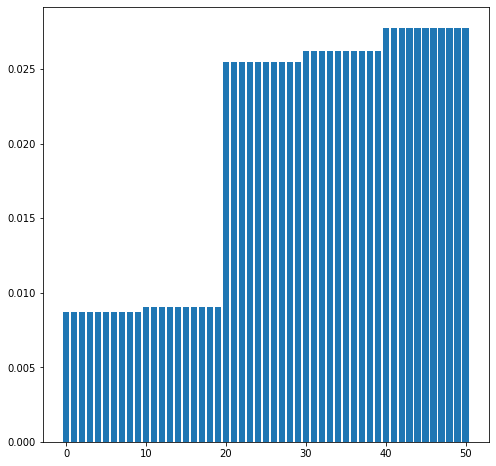

In [ ]:
plt.bar(range(51),jaotus_5v_jargi)

11. Genereerige juhuslikult 1365 äsjagenereeritud jaotusest. Kas näeb sarnane välja tegeliku jaotusega?

<BarContainer object of 51 artists>

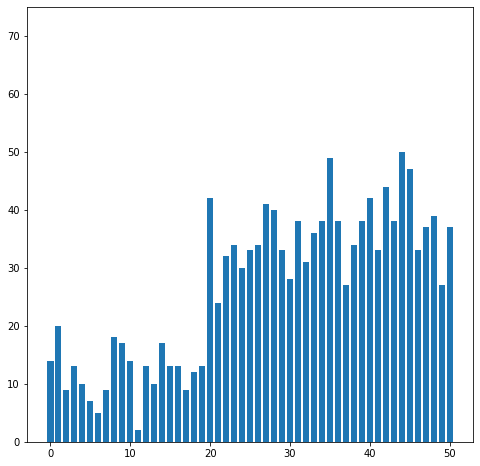

In [ ]:
rng = default_rng(0)
gen_5v_jargi = rng.choice(range(51), 1365, p = jaotus_5v_jargi )
gen_5v_sagedused = pd.value_counts(gen_5v_jargi)
gen_5v_sagedused_koos_nullidega = gen_5v_sagedused.reindex(range(51),fill_value=0)
plt.ylim((0,75))
plt.bar(range(51),gen_5v_sagedused_koos_nullidega.values)

12. Genereerige 100 andmestikku, leidke iga punktisumma kohta suurim ja vähim sagedus. Millised andmed on tegelikust erinevad?

In [ ]:
rng = default_rng(0)
min_sagedused = 51*[2000]
max_sagedused = 51*[0]
for i in range(100):
    gen_5v_jargi = rng.choice(range(51),size=1365,p=jaotus_5v_jargi)
    gen_5v_sagedused = pd.value_counts(gen_5v_jargi)
    gen_5v_sagedused_koos_nullidega = gen_5v_sagedused.reindex(range(51),fill_value=0)
    min_sagedused = np.minimum(min_sagedused,gen_5v_sagedused_koos_nullidega.values)
    max_sagedused = np.maximum(max_sagedused,gen_5v_sagedused_koos_nullidega.values)

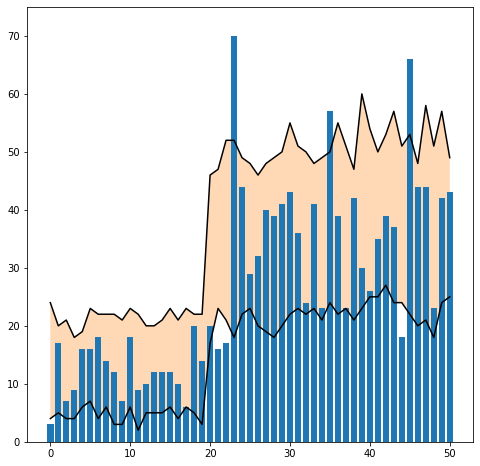

In [ ]:
plt.xticks(range(0,51,10))
plt.yticks(range(0,71,10))
plt.ylim((0,75))
plt.bar(data.punktisummad.value_counts().index, data.punktisummad.value_counts())
plt.fill_between(range(51),min_sagedused,max_sagedused,alpha=0.3)
plt.plot(range(51),min_sagedused,color='black')
plt.plot(range(51),max_sagedused,color='black')
plt.show()

13. Sobita andmetele täpsema kujuga jaotus kasutades meetodit KDE (kernel density estimation, vaata alltoodud vihjet). Kuva saadud jaotuse tihedusfunktsioon tegelike andmete suhteliste sageduste taustal.
    
VIHJE: Kasuta käsku `kde = stats.gaussian_kde(data.punktisummad)`, mis sisuliselt paneb iga andmepunkti ümber kitsa normaaljaotuse ning siis teeb kõigist nendest normaaljaotustest suure segu. Seejuures on selle käsu sees kasutusel kavalad meetodid, et nende kitsaste normaaljaotuste 'laius' parajalt valida. Jaotusel `kde` on defineeritud tihedusfunktsioon, mida saab rakendada sarnaselt nagu `scipy.stats.norm.pdf`, ehk siis `kde.pdf([10, 20])` ütleb tõenäosuse tiheduse väärtustel 10 ja 20 punkti. Jaotusfunktsiooni (cdf) otseselt ei ole, aga selle eest saab küsida näiteks 30.5 ja 31.5 vahele langemise tõenäosust: `kde.integrate_box([30.5],[31.5])`.

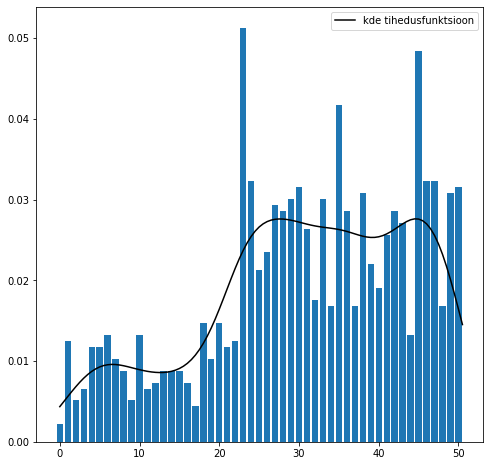

In [ ]:
from scipy import stats
kde = stats.gaussian_kde(data.punktisummad)
plt.bar(tegelikud_sagedused.index, tegelikud_sagedused/sum(tegelikud_sagedused))
plt.plot(np.arange(0,51,0.5), kde.pdf(np.arange(0,51,0.5)), c = "black", label = "kde tihedusfunktsioon")
plt.legend()

14. Arvuta kõigi võimalike täisarvuliste punktide 0 kuni 50 saamise tõenäosused kui punktid võtta KDE jaotusest ja seejärel ümardada. Visualiseeri leitud oodatavad suhtelised sagedused nüüd tulpdiagrammina.

<BarContainer object of 51 artists>

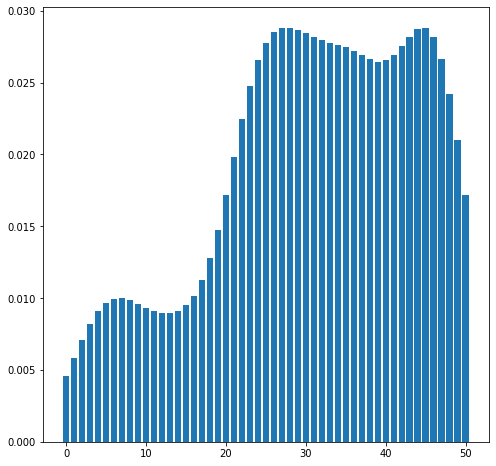

In [ ]:
t_kde = [kde.integrate_box([i-0.5], [i+0.5]) for i in range(51)]
t_kde = np.array(t_kde) / sum(t_kde)
plt.bar(range(51), t_kde)

15. Genereerige juhuslikult 1365 äsjagenereeritud jaotusest. Kas näeb sarnane välja tegeliku jaotusega?

In [ ]:
rng = default_rng(0)
jaotus_kde = rng.choice(np.arange(51), 1365, p = t_kde )

<BarContainer object of 51 artists>

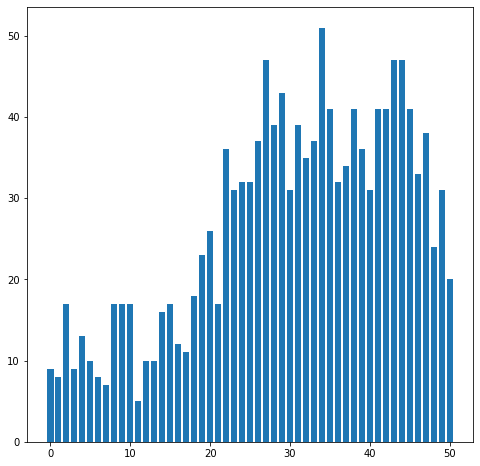

In [ ]:
plt.bar(np.arange(51), np.bincount(jaotus_kde))

16. Genereerige nüüd taas 100 andmestikku, leidke iga punktisumma kohta suurim ja vähim sagedus. Millised andmed on tegelikust erinevad?

In [ ]:
rng = default_rng(0)
min_sagedused_kde = 51*[2000]
max_sagedused_kde = 51*[0]
for i in range(100):
    kde_jargi = rng.choice(range(51), size=1365, p=t_kde)
    kde_sagedused = pd.value_counts(kde_jargi)
    kde_sagedused_koos_nullidega = kde_sagedused.reindex(range(51),fill_value=0)
    min_sagedused_kde = np.minimum(min_sagedused_kde,kde_sagedused_koos_nullidega.values)
    max_sagedused_kde = np.maximum(max_sagedused_kde,kde_sagedused_koos_nullidega.values)

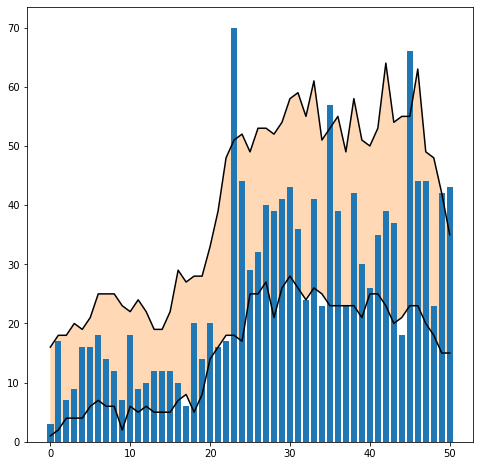

In [ ]:
plt.xticks(range(0,51,10))
plt.yticks(range(0,71,10))
plt.bar(data.punktisummad.value_counts().index, data.punktisummad.value_counts())
plt.fill_between(range(51),min_sagedused_kde, max_sagedused_kde, alpha=0.3)
plt.plot(range(51),min_sagedused_kde,color='black')
plt.plot(range(51),max_sagedused_kde,color='black')
plt.show()

# Ülesanne 2 - hüpoteesi testimine kaartidega

Virtuaalsest kaardipakist on ükshaaval väljastatud (ning pärast väljastamist tagasi pandud) 1300 kaarti. Iga kaarti esitame täisarvuna (lihtsuse mõttes tähistame kaarte numbritega 0-12, mida kutsume väärtusteks ja ei erista maste). <br> Sellisel viisil juhuslikult kaarte tõmmates saime igale väärtusele järgmised sagedused: 131, 93, 80, 95, 89, 125, 114, 89, 104, 89, 112, 100, 79, kus esimene arv tähistab väljastatud kahtede arvu, teine kolmede arvu, eelviimane kuningate arvu, viimane ässade arvu ning vahepealsed sama loogikaga. Ausas kaardipakis on 13 (0..12) erineva väärtusega kaarti 4-st mastist, kokku 52 kaarti.

1. Me ei tea, kas pakk genereeritakse ausalt (iga väärtuse saamine on sama tõenäoline) või ebaausalt - tahame seda kontrollida esitades nullhüpoteesi ja alternatiivse hüpoteesi iga väärtuse kohta. Valida sobiv statistik ning arvutada p-väärtus. Pärast arvutamist tuua välja, kas jäi kehtima nullhüpotees või visati see kõrvale ja eksisteerib suur tõenäosus alternatiivseks hüpoteesiks. Olulisuse nivooks valime **0.01**.
<br>Esitlege praktikumis arvamusi, kuidas võiks olla pakki muudetud.


**Vihje**:  p väärtuse leidmiseks saab kasutada scipy funktsiooni binomtest<br>
**Märkus 1**: Käsitleme seda ülesannet justkui väärtuste sagedused oleks sõltumatud, kuigi tegelikult ei ole <br>
**Märkus 2**: Teeme 13 erinevat katset (ühe nullhüpoteesi kohta), väljasta tulemused nii korregeeritud olulisuse nivooga kui ka ilma korrektsioonita.

**Sõnasta ühe väärtuse jaoks:**

Sõnastatud väärtuse 2 jaoks.

**Nullhüpotees**: Kaarti on väljastatud tõenäosusega 1/13
<br> **Alternatiivne hüpotees**: Kaardi väljastamise tõenäosus ei ole 1/13,
<br> **Statistik**: number 2 kaardi esinemissagedus

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng
from scipy.stats import binomtest

In [ ]:
rng = default_rng(0)
alfa = 0.01 #olulisuse nivoo
hüpoteeside_arv = 13 #13 hüpoteesi
kaartide_sagedused = [131, 93, 80, 95, 89, 125, 114, 89, 104, 89, 112, 100, 79]
kaartide_arv = sum(kaartide_sagedused) #1300

for i, kaart in enumerate(kaartide_sagedused):
    p = binomtest(kaart, kaartide_arv, p=1/13, alternative='two-sided').pvalue
    alfa_korr = alfa/hüpoteeside_arv
    print("kaardi nr: ",i)
    print("neid kaarte tõmmati: ",kaart)
    print("p-väärtus: ",p)
    print("korregeeritud olulisuse nivoo on: ",alfa_korr)
    if (p >= alfa_korr):
        print("jääb kehtima nullhüpotees \n")
    else:
        print("viskame kõrvale nullhüpoteesi, arvestame alternatiivse hüpoteesi võimalikkusega \n")
    print()

kaardi nr:  0
neid kaarte tõmmati:  131
p-väärtus:  0.0017717886489775994
korregeeritud olulisuse nivoo on:  0.0007692307692307692
jääb kehtima nullhüpotees 


kaardi nr:  1
neid kaarte tõmmati:  93
p-väärtus:  0.49871313126325617
korregeeritud olulisuse nivoo on:  0.0007692307692307692
jääb kehtima nullhüpotees 


kaardi nr:  2
neid kaarte tõmmati:  80
p-väärtus:  0.03721924876400631
korregeeritud olulisuse nivoo on:  0.0007692307692307692
jääb kehtima nullhüpotees 


kaardi nr:  3
neid kaarte tõmmati:  95
p-väärtus:  0.6395887430457021
korregeeritud olulisuse nivoo on:  0.0007692307692307692
jääb kehtima nullhüpotees 


kaardi nr:  4
neid kaarte tõmmati:  89
p-väärtus:  0.2742396841377364
korregeeritud olulisuse nivoo on:  0.0007692307692307692
jääb kehtima nullhüpotees 


kaardi nr:  5
neid kaarte tõmmati:  125
p-väärtus:  0.010741991715548103
korregeeritud olulisuse nivoo on:  0.0007692307692307692
jääb kehtima nullhüpotees 


kaardi nr:  6
neid kaarte tõmmati:  114
p-väärtus:  0.1

2. Kas antud juhul peaks kasutama korrigeeritud või korrigeerimata olulisuse nivood ning kuidas nende tulemused erinevad?

3. Milline test oleks sellise ülesande jaoks täpsem ja sobivam? Vaata, mis tulemuse see annab?

    **Märkus:** Lahendamiseks koos praktikumijuhendajaga, materjalides pole sellest veel räägitud.

In [ ]:
from scipy.stats import chisquare

observed = [131, 93, 80, 95, 89, 125, 114, 89, 104, 89, 112, 100, 79]
expected = [100]*13

chi2, p = chisquare(observed, expected)

print("chi2: ",chi2)
print("p-väärtus: ",p)

chi2:  32.2
p-väärtus:  0.0012887574251645064


# Ülesanne 3 - multinoomjaotus

Selles ülesandes on ette antud kood 2. loengu 3. osa esimese näitega sarnaste tulemuste genereerimiseks.

In [ ]:
rng = default_rng(0)

def aus_taring(kordi=1):
    return(rng.randint(1,7,size=kordi))

def volts_taring(kordi=1,eps=0.1):
    volts_toenaosused = 5*[1/6-eps]+[1/6+5*eps]
    return(rng.choice(range(1,7),size=kordi,p=volts_toenaosused))

#loendab kokku listis olevad elemendid
def taringu_sagedused(tulemused):
    sagedused = pd.value_counts(tulemused)
    sagedused_koos_nullidega = sagedused.reindex(range(1,7),fill_value=0)
    return(sagedused_koos_nullidega)

visked = volts_taring(kordi=12000,eps=1/150)
print(visked)
ts = taringu_sagedused(visked)
print(ts)

[4 2 1 ... 4 1 1]
1    1930
2    1889
3    1960
4    1857
5    1941
6    2423
Name: count, dtype: int64


<ipython-input-4-1bf7543377cf>:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sagedused = pd.value_counts(tulemused)


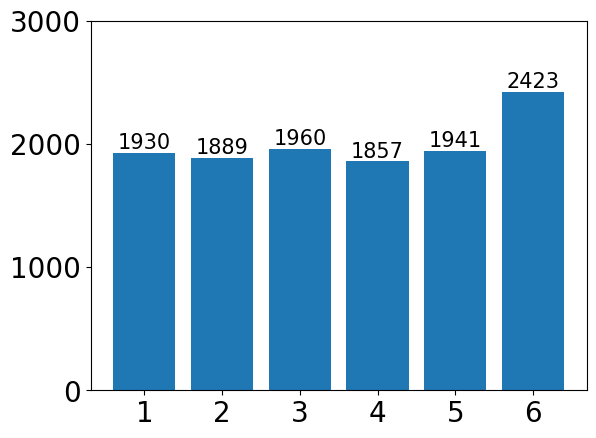

In [ ]:
plt.bar(ts.index,ts)
plt.xticks(fontsize=20)
plt.yticks([0,1000,2000,3000],fontsize=20)
for i in ts.index:
    plt.text(i,ts[i],ts[i],horizontalalignment='center',verticalalignment='bottom',fontsize=15)
plt.savefig('loeng_2_joonis_1_volts.png')
plt.show()

1. Kuidas leida tõenäosus täpselt sellise tulemuse saamiseks, nagu on pildil näha, ausa täringuga? <br> Kasutada tuleks Pythoni teeki `scipy.stats`. Kasuks tulevad ka loengu slaidid ja tulemus võiks olla saavutatud 2 reaga (2 käsuga), ehk siis ärge implementeerige enda meetodit vaid üritage kasutada olemas olevaid teeke.
<br> Vihje: Loengu slaididel on välja toodud ka kasutatud jaotus

In [ ]:
from scipy.stats import multinomial

rv = multinomial(12000, 6*[1/6]) #multinoom
print(rv.pmf([1930, 1889, 1960, 1857, 1941, 2423])) # generator seed võib väärtusi muuta
print(rv.pmf([2000]*6))

1.686932659063226e-33
1.3833924700689356e-10


2. Mis on võimalikud tulemused kui me viskame kolmetahulist täringut kokku kaks korda. Kirjutage välja kõik võimalikud kombinatsioonid ja nende tõenäosused. Esialgu arvutage käsitsi (teeme koos tahvlil), seejärel kasutage mainitud Pythoni teeki.

In [ ]:
from scipy.stats import multinomial
rv = multinomial(2, 3*[1/3]) #multinoom
print("1 silma 2 korda: ",rv.pmf([2,0,0]))
print("2 silma 2 korda: ",rv.pmf([0,2,0]))
print("3 silma 2 korda: ",rv.pmf([0,0,2]))
print("1 silma 1 korra, 2 silma 1 korra: ",rv.pmf([1,1,0]))
print("1 silma 1 korra, 3 silma 1 korra: ",rv.pmf([1,0,1]))
print("2 silma 1 korra, 3 silma 1 korra: ",rv.pmf([0,1,1]))

1 silma 2 korda:  0.11111111111111109
2 silma 2 korda:  0.11111111111111109
3 silma 2 korda:  0.11111111111111115
1 silma 1 korra, 2 silma 1 korra:  0.2222222222222222
1 silma 1 korra, 3 silma 1 korra:  0.2222222222222223
2 silma 1 korra, 3 silma 1 korra:  0.2222222222222223


# Ülesanne 4 - Võimsus

Laual on aus münt ja ebaaus münt. Tahame kontrollida kas valitud münt on ebaaus. On teada, et ebaausa mündi korral on "kulli" või "kirja" saamise tõenäosus 0,75. Kasutades binoom testi, mitu viset peab tegema, et teist liiki vea (vale negatiivne) tegemise tõenäosus ei oleks suurem kui 0,2.

Vihje: uuri mis teeb käsk binom.ppf

In [1]:
from scipy.stats import binom

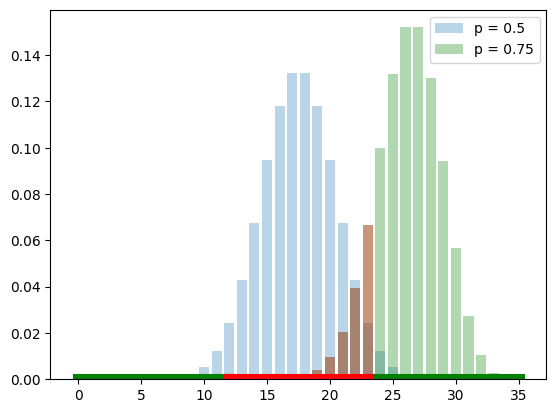

In [5]:
# Plot mis aitab seletada testi võimsust.
# mis näitab p=0.5 jaotust ja p=0.75 jaotust. Viimane on jaotatud kaheks, ning punasega on p=0.75 jaotuse osa mis jääb H0 regiooni ning rohelisega H1 regioon.
n = 35

region = (binom.ppf(0.025, n, p = 0.5), binom.ppf(0.975, n, p = 0.5)) # ppf on kvantiilfunktsioon

plt.bar(np.arange(n+1), binom.pmf(np.arange(n+1), p = 0.5, n = n), alpha = 0.3, label = "p = 0.5")
plt.bar(np.arange(n+1), binom.pmf(np.arange(n+1), p = 0.75, n = n), alpha = 0.3, color ="green", label = "p = 0.75")

plt.bar(np.arange(region[0], region[1] + 1), binom.pmf(np.arange(region[0], region[1] + 1), p = 0.75, n = n), alpha = 0.3, color = "red")

plt.plot([0, region[0]], [0, 0], color = "green", linewidth = 8) # Kuvame rohelise joonega H1 regiooni.
plt.plot([region[1], n], [0, 0], color = "green", linewidth = 8)

plt.plot(region, [0, 0], color = "red", linewidth = 8) # Kuvame punase joonega H0 regiooni.

plt.legend()

In [ ]:
binom.cdf(region[1], p = 0.75, n = n) - binom.cdf(region[0], p = 0.75, n = n) # Summeerime kokku H0 regiooni tõenäosuse kui p = 0.75

0.14211257125175825

In [ ]:
võimsus = []

for n in range(5, 101):
  võimsus.append(1 - (binom.cdf(binom.ppf(0.975, n, p = 0.5), p = 0.75, n = n) - binom.cdf(binom.ppf(0.025, n, p = 0.5), p = 0.75, n = n)))

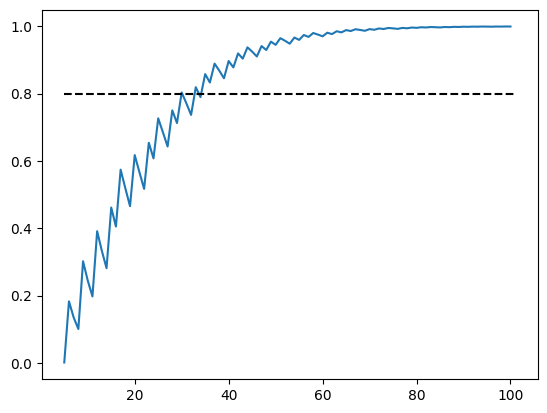

In [ ]:
plt.plot(np.arange(5, 101), võimsus)
plt.plot([5, 101], [0.8, 0.8], linestyle = "dashed", color = "black")